<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/Hands%201NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import random

np.random.seed(seed=1234)
random.seed(1234)

In [3]:
tf.__version__, keras.__version__

('2.4.1', '2.4.0')

In [4]:
fashion_mnist = keras.datasets.fashion_mnist # requests

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
X_valid.shape, X_train.shape

((5000, 28, 28), (55000, 28, 28))

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
class_names[y_train[4]]

'Ankle boot'

In [9]:
# Agregamos capa uno por uno
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation=keras.activations.elu))
model.add(keras.layers.Dense(100, activation='elu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
# Agregamos capa todos por una lista
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[28,28]),
                                 keras.layers.Dense(300, activation=keras.activations.relu),
                                 keras.layers.Dense(100, activation='relu'),
                                 keras.layers.Dense(10, activation=keras.activations.softmax)
])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.layers[0].name, model.layers

('flatten_1',
  <tensorflow.python.keras.layers.core.Dense at 0x7fb3e4bf21d0>])

In [13]:
weights, biases = model.layers[1].get_weights()

print(weights.shape)
weights

(784, 300)


array([[ 0.01185548,  0.03785495,  0.02564358, ..., -0.0569337 ,
        -0.05094483,  0.0478861 ],
       [ 0.00798636,  0.04008186, -0.01994854, ..., -0.04532187,
         0.05959325, -0.00253442],
       [-0.05348039, -0.0291991 ,  0.07396939, ...,  0.00135602,
         0.00373742, -0.03610799],
       ...,
       [ 0.02593322,  0.01353467, -0.07396735, ..., -0.05302054,
         0.06152248, -0.07077888],
       [ 0.03123388,  0.00334032,  0.03113235, ...,  0.0715481 ,
         0.01162887,  0.04054488],
       [-0.0289488 ,  0.05845256,  0.04307881, ..., -0.05818821,
         0.00941055, -0.07406262]], dtype=float32)

In [14]:
print(biases.shape)
biases

(300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [15]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [16]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0144 - sparse_categorical_accuracy: 0.6822 - val_loss: 0.5043 - val_sparse_categorical_accuracy: 0.8288
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5100 - sparse_categorical_accuracy: 0.8223 - val_loss: 0.4628 - val_sparse_categorical_accuracy: 0.8420
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4599 - sparse_categorical_accuracy: 0.8407 - val_loss: 0.4649 - val_sparse_categorical_accuracy: 0.8438
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4295 - sparse_categorical_accuracy: 0.8502 - val_loss: 0.4053 - val_sparse_categorical_accuracy: 0.8606
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3985 - sparse_categorical_accuracy: 0.8613 - val_loss: 0.4060 - val_sparse_categorical_accuracy: 0.8638
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3823 - spars

In [17]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

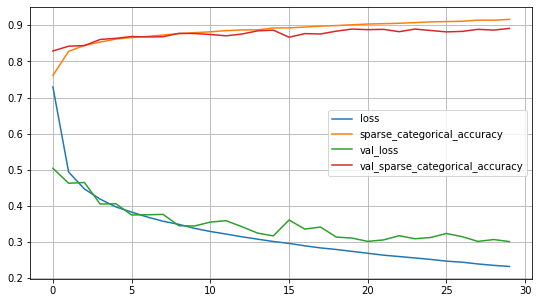

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(9,5))
plt.grid()
plt.show()

In [19]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 65.9760 - sparse_categorical_accuracy: 0.8483


[65.97604370117188, 0.8482999801635742]

In [20]:
val = X_test[:3]

y_pred = model.predict(val)

y_pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
import numpy as np

np.array(model.predict_classes(val))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [22]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dta = fetch_california_housing()

X_train, X_, y_train, y_ = train_test_split(dta.data, dta.target, train_size=0.7)
X_test, X_val, y_test, y_val = train_test_split(X_, y_, test_size=0.5)

In [23]:
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [24]:
X_train.shape, X_test.shape, X_val.shape

#y_train.shape, y_test.shape, y_val.shape

((14447, 8), (3096, 8), (3097, 8))

In [25]:
reg_model = keras.models.Sequential([keras.layers.Dense(30, activation=keras.activations.elu, input_shape=X_train.shape[1:]),
                                     keras.layers.Dense(1)])

reg_model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.SGD(nesterov=True), metrics=[keras.metrics.mean_squared_error])
history = reg_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))


Epoch 1/20
452/452 [==============================] - 1s 2ms/step - loss: 1.1622 - mean_squared_error: 1.1622 - val_loss: 0.5217 - val_mean_squared_error: 0.5217
Epoch 2/20
452/452 [==============================] - 1s 1ms/step - loss: 1.0976 - mean_squared_error: 1.0976 - val_loss: 0.5103 - val_mean_squared_error: 0.5103
Epoch 3/20
452/452 [==============================] - 1s 1ms/step - loss: 0.4796 - mean_squared_error: 0.4796 - val_loss: 0.4435 - val_mean_squared_error: 0.4435
Epoch 4/20
452/452 [==============================] - 1s 1ms/step - loss: 0.4576 - mean_squared_error: 0.4576 - val_loss: 0.4407 - val_mean_squared_error: 0.4407
Epoch 5/20
452/452 [==============================] - 1s 1ms/step - loss: 0.4427 - mean_squared_error: 0.4427 - val_loss: 0.4405 - val_mean_squared_error: 0.4405
Epoch 6/20
452/452 [==============================] - 1s 1ms/step - loss: 0.4422 - mean_squared_error: 0.4422 - val_loss: 0.4265 - val_mean_squared_error: 0.4265
Epoch 7/20
452/452 [========

In [26]:
_input = keras.layers.Input(shape=X_train.shape[1:])
hidden_1 = keras.layers.Dense(30, activation=keras.activations.elu)(_input)
hidden_2 = keras.layers.Dense(30, activation=keras.activations.relu)(hidden_1)

concat = keras.layers.Concatenate()([_input, hidden_2])
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[_input], outputs=[output])

In [66]:
Ainput = keras.layers.Input(shape=[5], name='wide input')
Binput = keras.layers.Input(shape=[6], name='deep input')

hidden_1 = keras.layers.Dense(30, activation=keras.activations.elu)(Binput)
hidden_2 = keras.layers.Dense(30, activation=keras.activations.relu)(hidden_1)

concat = keras.layers.concatenate([Ainput, hidden_2])
output = keras.layers.Dense(1, name='output')(concat)

model = keras.Model(inputs=[Ainput, Binput], outputs=output)

In [67]:
# Esto evita el overfitting es como una regularizacion
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001), loss=keras.losses.mean_squared_error, metrics=[keras.metrics.mean_squared_error])

X_trainA, X_trainB = X_train[:, :5], X_train[:, 2:]
X_testA, X_testB = X_test[:, :5], X_test[:, 2:]
X_valA, X_valB = X_val[:,:5], X_val[:,2:]

X_newA, X_newB = X_testA[:3], X_testB[:3]

history = model.fit((X_trainA, X_trainB), y_train, epochs=20, validation_data=((X_valA, X_valB), y_val))

Epoch 1/20
452/452 [==============================] - 1s 2ms/step - loss: 3.2200 - mean_squared_error: 3.2200 - val_loss: 0.7281 - val_mean_squared_error: 0.7281
Epoch 2/20
452/452 [==============================] - 1s 1ms/step - loss: 0.6776 - mean_squared_error: 0.6776 - val_loss: 0.5924 - val_mean_squared_error: 0.5924
Epoch 3/20
452/452 [==============================] - 1s 1ms/step - loss: 0.5946 - mean_squared_error: 0.5946 - val_loss: 0.5426 - val_mean_squared_error: 0.5426
Epoch 4/20
452/452 [==============================] - 1s 1ms/step - loss: 0.5500 - mean_squared_error: 0.5500 - val_loss: 0.5132 - val_mean_squared_error: 0.5132
Epoch 5/20
452/452 [==============================] - 1s 1ms/step - loss: 0.5304 - mean_squared_error: 0.5304 - val_loss: 0.4952 - val_mean_squared_error: 0.4952
Epoch 6/20
452/452 [==============================] - 1s 1ms/step - loss: 0.5052 - mean_squared_error: 0.5052 - val_loss: 0.4849 - val_mean_squared_error: 0.4849
Epoch 7/20
452/452 [========

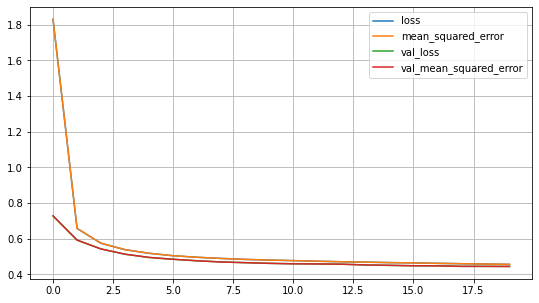

In [68]:
pd.DataFrame(history.history).plot(figsize=(9,5))
plt.grid()
plt.show()

In [69]:
pd.DataFrame(history.history)['loss']

0     1.829689
1     0.657742
2     0.574593
3     0.538609
4     0.518491
5     0.504721
6     0.496050
7     0.489609
8     0.484201
9     0.480436
10    0.477343
11    0.474062
12    0.471053
13    0.468865
14    0.466231
15    0.464650
16    0.462163
17    0.460016
18    0.458111
19    0.456341
Name: loss, dtype: float64

In [70]:
mse_test = model.evaluate((X_testA, X_testB), y_test)

97/97 [==============================] - 0s 1ms/step - loss: 0.4704 - mean_squared_error: 0.4704


In [71]:
y_pred = model.predict((X_newA, X_newB))

In [72]:
y_test[:3]

array([1.607, 2.47 , 0.973])

In [75]:
y_pred

array([[1.7487915],
       [2.0847092],
       [1.5529482]], dtype=float32)

In [83]:
# NN con output auxiliar
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden_2)

model = keras.Model(inputs=[Ainput, Binput], outputs=[output, aux_output])

In [84]:
model.compile(loss=[keras.losses.mean_squared_error, keras.losses.mean_squared_error],
              loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=0.001))

In [85]:
history = model.fit([X_trainA, X_trainB], [y_train, y_train], epochs=20, validation_data=([X_valA, X_valB], [y_val, y_val]))

Epoch 1/20
452/452 [==============================] - 1s 2ms/step - loss: 3.4517 - main_output_loss: 3.2751 - aux_output_loss: 5.0413 - val_loss: 0.9536 - val_main_output_loss: 0.7723 - val_aux_output_loss: 2.5856
Epoch 2/20
452/452 [==============================] - 1s 2ms/step - loss: 0.8905 - main_output_loss: 0.7327 - aux_output_loss: 2.3109 - val_loss: 0.7033 - val_main_output_loss: 0.6046 - val_aux_output_loss: 1.5917
Epoch 3/20
452/452 [==============================] - 1s 2ms/step - loss: 0.7048 - main_output_loss: 0.6175 - aux_output_loss: 1.4909 - val_loss: 0.6177 - val_main_output_loss: 0.5480 - val_aux_output_loss: 1.2452
Epoch 4/20
452/452 [==============================] - 1s 1ms/step - loss: 0.6186 - main_output_loss: 0.5516 - aux_output_loss: 1.2217 - val_loss: 0.5761 - val_main_output_loss: 0.5164 - val_aux_output_loss: 1.1134
Epoch 5/20
452/452 [==============================] - 1s 2ms/step - loss: 0.5903 - main_output_loss: 0.5353 - aux_output_loss: 1.0854 - val_loss

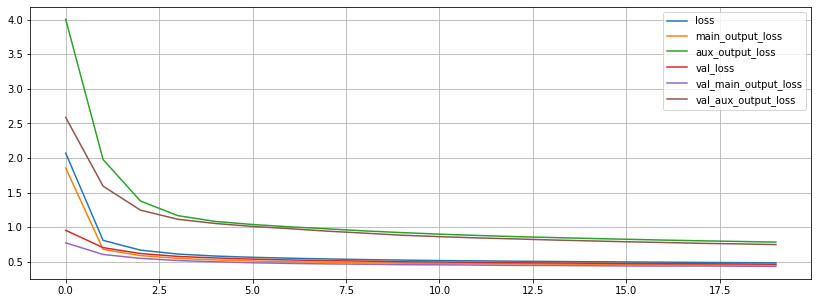

In [86]:
pd.DataFrame(history.history).plot(figsize=(14,5))
plt.grid()
plt.show()

In [87]:
total_loss, main_loss, aux_loss = model.evaluate([X_testA, X_testB], [y_test, y_test])

97/97 [==============================] - 0s 1ms/step - loss: 0.4961 - main_output_loss: 0.4628 - aux_output_loss: 0.7960


In [88]:
total_loss, main_loss, aux_loss

(0.49608010053634644, 0.462756872177124, 0.7959904670715332)

In [89]:
y_pred, y_pred_aux = model.predict([X_newA, X_newB])

In [90]:
y_pred

array([[1.7351187],
       [2.213303 ],
       [1.4408445]], dtype=float32)

In [91]:
y_pred_aux

array([[2.1101046],
       [2.8149686],
       [2.17874  ]], dtype=float32)

In [92]:
y_test[:3]

array([1.607, 2.47 , 0.973])

In [110]:
class WideandDeepModel(keras.Model):

  def __init__(self, units=30, activation='relu', **kwargs):

    super().__init__(**kwargs)
    self.hidden_1 = keras.layers.Dense(units, activation=activation)
    self.hidden_2 = keras.layers.Dense(units, activation=activation)

    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)

  
  def call(self, inputs):

    input_A, input_B = inputs # inputs de seguro es una lista
    hidden_1 = self.hidden_1(input_B)
    hidden_2 = self.hidden_2(hidden_1)
    
    concat = keras.layers.concatenate([input_A, hidden_2])

    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden_2)
    
    return main_output, aux_output

In [112]:
model = WideandDeepModel()

In [113]:
main_output, aux_output = model.call([X_trainA, X_trainB])

In [114]:
main_output[:3]

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[ 0.17972627],
       [ 0.613424  ],
       [-0.36688757]], dtype=float32)>

In [115]:
aux_output[:3]

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[-0.11005794],
       [ 0.12395096],
       [ 0.2213064 ]], dtype=float32)>

In [117]:
y_train[:3]

array([1.405, 0.652, 1.683])

In [129]:
modelo = keras.Sequential([
                           keras.layers.Dense(30, activation=keras.activations.elu),
                           keras.layers.Dense(20, activation=keras.activations.elu),
                           keras.layers.Dense(1, activation=keras.activations.relu)
])

modelo.compile(optimizer=keras.optimizers.RMSprop(), loss=keras.losses.mean_absolute_error, metrics=[keras.metrics.mean_absolute_percentage_error])

history = modelo.fit(X_train, y_train, epochs=44, validation_data=(X_val, y_val))


Epoch 1/44
452/452 [==============================] - 1s 2ms/step - loss: 1.0587 - mean_absolute_percentage_error: 54.3116 - val_loss: 0.4805 - val_mean_absolute_percentage_error: 25.9073
Epoch 2/44
452/452 [==============================] - 1s 1ms/step - loss: 0.4881 - mean_absolute_percentage_error: 26.9166 - val_loss: 0.4682 - val_mean_absolute_percentage_error: 25.9264
Epoch 3/44
452/452 [==============================] - 1s 1ms/step - loss: 0.4683 - mean_absolute_percentage_error: 25.9337 - val_loss: 0.4620 - val_mean_absolute_percentage_error: 24.8403
Epoch 4/44
452/452 [==============================] - 1s 1ms/step - loss: 0.4616 - mean_absolute_percentage_error: 25.2031 - val_loss: 0.4544 - val_mean_absolute_percentage_error: 24.5623
Epoch 5/44
452/452 [==============================] - 1s 1ms/step - loss: 0.4496 - mean_absolute_percentage_error: 24.9655 - val_loss: 0.4465 - val_mean_absolute_percentage_error: 23.9700
Epoch 6/44
452/452 [==============================] - 1s 1ms

In [128]:
modelo.evaluate(X_test, y_test)

97/97 [==============================] - 0s 961us/step - loss: 0.3843 - mean_absolute_percentage_error: 21.0909


[0.3842598795890808, 21.090911865234375]

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

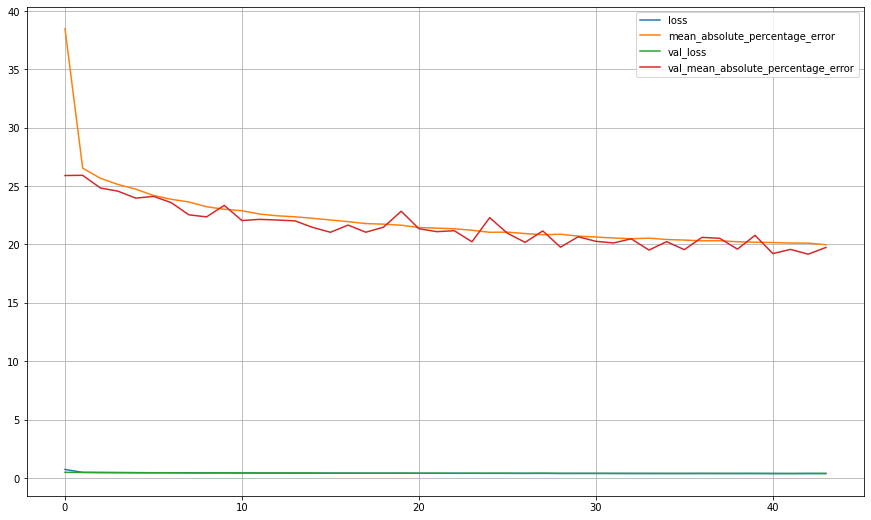

In [151]:
pd.DataFrame(history.history).plot(figsize=(15,9))
plt.grid()
plt.show()

In [152]:
modelo.save('my_model.h5')

In [ ]:
modelo.summary()

modelo.weights[0:1]

In [ ]:
delo = keras.models.load_model('/content/my_model.h5')

delo.summary()

delo.weights[0:1]

In [190]:
delo.weights[0:1] == delo.weights[0:1]

True

In [210]:
stopping = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

# EarlyStopping es para parar en caso de que el resultado empeore despues de 2 itter

hist = modelo.fit(X_train, y_train, epochs=35, callbacks=[lo])

Epoch 1/35
452/452 [==============================] - 1s 1ms/step - loss: 0.3413 - mean_absolute_percentage_error: 18.0120
Epoch 2/35
452/452 [==============================] - 1s 1ms/step - loss: 0.3420 - mean_absolute_percentage_error: 18.0039
Epoch 3/35
452/452 [==============================] - 1s 1ms/step - loss: 0.3412 - mean_absolute_percentage_error: 17.9848
Epoch 4/35
452/452 [==============================] - 1s 1ms/step - loss: 0.3423 - mean_absolute_percentage_error: 18.0276
Epoch 5/35
452/452 [==============================] - 1s 1ms/step - loss: 0.3414 - mean_absolute_percentage_error: 18.0223
Epoch 6/35
452/452 [==============================] - 1s 1ms/step - loss: 0.3410 - mean_absolute_percentage_error: 18.0049
Epoch 7/35
452/452 [==============================] - 1s 1ms/step - loss: 0.3408 - mean_absolute_percentage_error: 17.9782
Epoch 8/35
452/452 [==============================] - 1s 1ms/step - loss: 0.3404 - mean_absolute_percentage_error: 17.9504
Epoch 9/35
452/4